In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns 

In [4]:
df1= pd.read_excel('.\\FD001\\03 His_NWP_FD.xlsx').drop('Datetime',axis=1)
df1.head(10)
df2=pd.read_excel('.\\FD001\\02 His_Power_FD.xlsx').drop('Datetime',axis=1)
dataset=pd.read_excel('.\\FD001\\04 Fore_NWP_FD.xlsx')
df = pd.concat([df1, df2], axis=1)#合并两个文件，把功率作为最后一列
df.head(10)

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
0,3.3696,290.3172,4.1829,295.0334,4.9253,297.9698,5.6139,300.0360,6.2446,301.5774,6.5423,302.1353,27.59,1003.96,93.20,0.0216
1,3.3092,291.4477,4.1100,296.1286,4.8389,299.0546,5.5137,301.1241,6.1388,302.6287,6.4347,303.2702,27.61,1004.37,93.05,0.0218
2,3.4671,295.0868,4.2669,299.3285,5.0000,302.0054,5.6718,303.8582,6.2926,305.2307,6.5832,305.7906,27.62,1004.25,92.96,0.4021
3,3.6896,296.9123,4.4933,300.7888,5.2253,303.4468,5.9067,305.1430,6.5341,306.5367,6.8241,307.1386,27.62,1003.96,92.82,0.5867
4,3.7095,298.4995,4.5220,302.3546,5.2791,304.8942,5.9740,306.6973,6.6113,307.9966,6.9170,308.5434,27.64,1003.68,92.59,0.3889
5,3.5143,302.9213,4.3541,306.5014,5.1350,308.8341,5.8376,310.4842,6.4950,311.6921,6.8108,312.1435,27.67,1003.46,92.28,0.1336
6,3.3300,306.6978,4.1933,310.2604,4.9758,312.4751,5.7001,314.0049,6.3640,315.1273,6.6825,315.5457,27.70,1003.34,91.95,0.2963
7,3.0254,311.3819,3.9033,314.7924,4.7046,316.8087,5.4395,318.2790,6.1261,319.2364,6.4418,319.6592,27.74,1003.29,91.66,0.6714
8,3.7342,313.9150,4.4407,315.3649,5.0855,316.3544,5.6676,317.0735,6.2148,317.6085,6.4637,317.8217,26.83,1003.21,0.00,1.1557
9,3.1972,313.4792,4.0589,315.3993,4.8314,316.5935,5.5416,317.4133,6.1961,318.0746,6.5025,318.3665,27.53,1002.76,0.00,1.1521


In [5]:
df.shape

(672, 16)

In [6]:
df.describe()#浅浅看一下数据的组成

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.712421,223.926814,4.233122,222.229419,4.701244,218.922899,5.060789,219.404941,5.383788,219.130152,5.537242,217.072215,28.737143,1003.606607,58.546429,3.710794
std,1.602134,125.927252,1.792286,129.786391,1.988854,132.941549,2.061636,134.193927,2.126308,135.181068,2.159798,136.099331,1.301262,2.377774,41.399879,3.638163
min,0.540100,1.199700,0.490400,0.212200,0.411800,0.000000,0.813900,0.196900,0.863800,0.243800,0.898200,0.000000,25.980000,999.070000,0.000000,0.011400
25%,2.331450,62.434675,2.681150,58.140175,3.002925,54.946750,3.293625,53.203400,3.538725,51.951200,3.673775,50.321350,27.620000,1001.907500,0.000000,0.655450
50%,3.548950,296.837700,4.031700,299.033550,4.465850,300.276050,4.926550,301.582200,5.317150,302.442250,5.508950,302.320400,28.590000,1003.165000,80.340000,2.428400
75%,4.835750,313.453400,5.648275,314.043075,6.198675,314.921200,6.732225,316.457950,7.129950,317.304775,7.275200,317.133050,29.910000,1004.670000,91.927500,6.543700
max,10.449900,359.149100,11.169100,359.729700,11.825700,358.931200,12.435400,359.756200,13.002000,359.745900,13.266700,359.649200,31.270000,1010.140000,101.310000,14.473900


In [7]:
df.info()#浅浅看一下数据的类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Speed10       672 non-null    float64
 1   Direction10   672 non-null    float64
 2   Speed30       672 non-null    float64
 3   Direction30   672 non-null    float64
 4   Speed50       672 non-null    float64
 5   Direction50   672 non-null    float64
 6   Speed70       672 non-null    float64
 7   Direction70   672 non-null    float64
 8   Speed90       672 non-null    float64
 9   Direction90   672 non-null    float64
 10  Speed100      672 non-null    float64
 11  Direction100  672 non-null    float64
 12  Temper        672 non-null    float64
 13  Pressure      672 non-null    float64
 14  Humidity      672 non-null    float64
 15  Power(MW)     672 non-null    float64
dtypes: float64(16)
memory usage: 84.1 KB


In [8]:
df.corr()#看一下数据的相关性，相关性不高，估计是很难做预测

,Speed10,Direction10,Speed30,Direction30,Speed50,Direction50,Speed70,Direction70,Speed90,Direction90,Speed100,Direction100,Temper,Pressure,Humidity,Power(MW)
Speed10,1.000000,0.149962,0.971867,0.167410,0.926862,0.200770,0.906074,0.194637,0.883722,0.199181,0.871603,0.215975,0.314905,0.430541,-0.024530,-0.264213
Direction10,0.149962,1.000000,0.238560,0.944176,0.295636,0.885790,0.333344,0.828948,0.361558,0.772673,0.373382,0.757999,-0.264848,0.355446,0.004028,-0.543841
Speed30,0.971867,0.238560,1.000000,0.254366,0.988750,0.284737,0.976086,0.276875,0.958639,0.280350,0.948483,0.297834,0.230256,0.531163,-0.012314,-0.313456
Direction30,0.167410,0.944176,0.254366,1.000000,0.309878,0.935556,0.346403,0.875396,0.373536,0.815704,0.384835,0.799625,-0.257859,0.371690,0.004534,-0.528038
Speed50,0.926862,0.295636,0.988750,0.309878,1.000000,0.337289,0.994998,0.328396,0.982707,0.330903,0.974773,0.348269,0.160462,0.580292,-0.002114,-0.338964
Direction50,0.200770,0.885790,0.284737,0.935556,0.337289,1.000000,0.372128,0.936844,0.397646,0.873644,0.408122,0.855950,-0.215424,0.387705,-0.008653,-0.515759
Speed70,0.906074,0.333344,0.976086,0.346403,0.994998,0.372128,1.000000,0.362221,0.996049,0.363973,0.991770,0.381499,0.107949,0.574089,0.010207,-0.356926
Direction70,0.194637,0.828948,0.276875,0.875396,0.328396,0.936844,0.362221,1.000000,0.386968,0.932897,0.397077,0.913866,-0.194624,0.380836,-0.029812,-0.494287
Speed90,0.883722,0.361558,0.958639,0.373536,0.982707,0.397646,0.996049,0.386968,1.000000,0.388005,0.999207,0.405470,0.061236,0.553272,0.022956,-0.369306
Direction90,0.199181,0.772673,0.280350,0.815704,0.330903,0.873644,0.363973,0.932897,0.388005,1.000000,0.397828,0.979318,-0.163644,0.380875,-0.037716,-0.483797


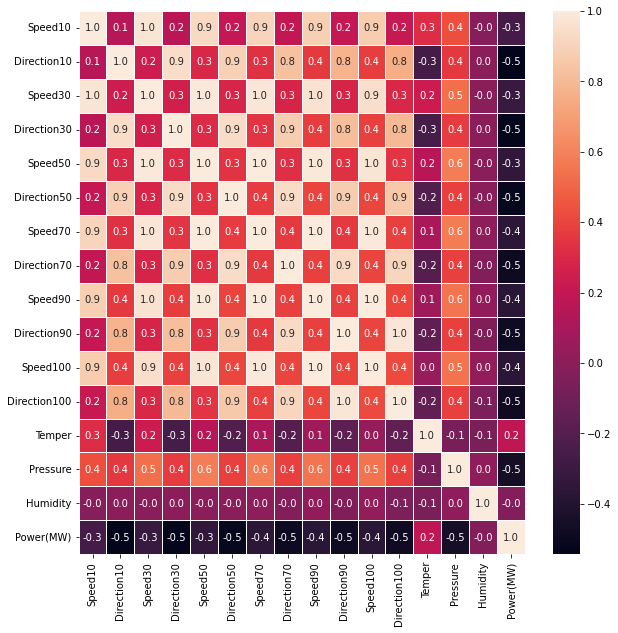

In [9]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()#画热力相关图，更加直观

In [10]:
stock_df_train = df[:int(0.85*len(df))]
stock_df_valid = df[int(0.85*len(df)):int(0.89*len(df))]
stock_df_test = df[int(0.88*len(df)):]#划分训练集，交叉验证集，测试集

In [11]:
stock_df_valid.shape

(27, 16)

In [12]:
stock_df_train.shape

(571, 16)

In [13]:
#做归一化处理
scaler = MinMaxScaler()
scaler = scaler.fit(stock_df_train)
stock_df_train = scaler.transform(stock_df_train)
stock_df_valid = scaler.transform(stock_df_valid)
stock_df_test =  scaler.transform(stock_df_test)

In [14]:
stock_df_valid.shape

(27, 16)

In [15]:
#将数据集的前四天取出来，作为一个合集，并且将最后一列输出结果取出来以便于做训练以及预测
def split_x_and_y1(array, days_used_to_train=4):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X, train_y = split_x_and_y1(stock_df_train)
valid_X, valid_y = split_x_and_y1(stock_df_valid)
test_X, test_y = split_x_and_y1(stock_df_test)

print('Shape of Train X: {} \n Shape of Train y: {}'.format(train_X.shape, train_y.shape))
print(train_X[:5, -1, -1])
print(train_y[:5])

Shape of Train X: (567, 4, 16) 
 Shape of Train y: (567,)
[0.03977874 0.02610199 0.00844944 0.01969922 0.04563526]
[0.02610199 0.00844944 0.01969922 0.04563526 0.07912187]


In [16]:
test_X.shape

(77, 4, 16)

In [17]:
valid_X.shape

(23, 4, 16)

In [18]:
#构建两层LSTM模型，input_shape是train_X的训练集的大小，return_sequences是返回的特征量为多维，不然到不了下一层
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=100,input_shape=(4,16),return_sequences=True))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dense(1))
model.summary()
model.compile(
    optimizer='adam',
    loss='mse'
)
#选择梯度下降函数为adam，学长说好，损失函数选mse，是因为试了mae，mape,mlse后，还是这个效果最好

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 100)            46800     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 89,105
Trainable params: 89,105
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=25,
    epochs=100
)
#做模型训练，只选择了一百个循环，选的样本大小为25

Epoch 1/100
23/23 [==============================] - 4s 38ms/step - loss: 0.0662 - val_loss: 0.0180
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.0012
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0012
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0018
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.0018
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 4.7980e-04
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 3.7049e-04
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0081 - val_loss: 0.0039
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0017


In [20]:
test_X.shape

(77, 4, 16)

In [21]:
pred_y = model.predict(test_X)
#做模型的预测

3/3 [==============================] - 1s 3ms/step


In [22]:
test_y=np.mat(test_y)
test_y=test_y.T
test_y.shape
#将预测结果由数组转换为矩阵，再转置得到（77，1）的一维矩阵

(77, 1)

In [23]:
#stock_df_test.shape
test=stock_df_test[4:,:-1]
test.shape
#从训练集里面取第五天后的，并且去除最后一列输出结果，为了反归一化

(77, 15)

In [24]:
#合并两个矩阵，以便于反归一化
test1=np.concatenate([test,pred_y],axis=1)
test2=np.concatenate([test,test_y],axis=1)

In [25]:
#反归一化
test1=scaler.inverse_transform(test1)
test2=scaler.inverse_transform(test2)


In [26]:
#取最后一列结果
pred_y=test1[:,-1]
test_y=test2[:,-1]

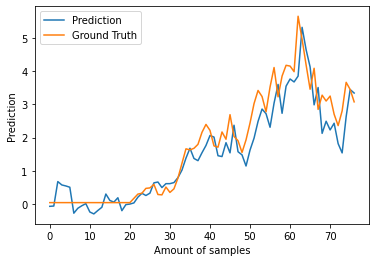

In [27]:
#画图，将预测结果和原结果比较
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [28]:
#新定义一个划分集合的函数，为了方便以后的模型函数的实现
def split_x_and_y(array, days_used_to_train):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :-1])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X, train_y = split_x_and_y(stock_df_train,2)
valid_X, valid_y = split_x_and_y(stock_df_valid,2)
test_X, test_y = split_x_and_y(stock_df_test,2)


In [29]:
#训练模型，由于给的数据没有结果了，需要只用天气预测发电量，故不取最后一列输出结果，由前面可知，相关性较差，故肯定不太能较好预测
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=100,input_shape=(2,15),return_sequences=True))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dense(1))
model.summary()
model.compile(
    optimizer='adam',
    loss='mse'
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 100)            46400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 88,705
Trainable params: 88,705
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=25,
    epochs=100
)

Epoch 1/100
23/23 [==============================] - 4s 35ms/step - loss: 0.0906 - val_loss: 0.0459
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0584 - val_loss: 0.0163
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.0079
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0464 - val_loss: 0.0059
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0039
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0406 - val_loss: 8.7962e-04
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0392 - val_loss: 6.1381e-04
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.0017
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.0070
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0376 - val_loss: 0.0014


In [31]:
pred_y = model.predict(test_X)

3/3 [==============================] - 1s 4ms/step


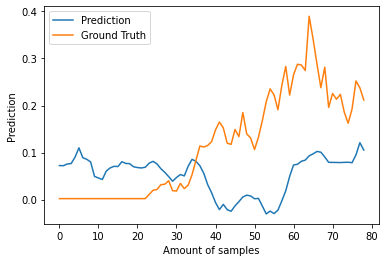

In [32]:
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [33]:
#这里对train_X和valid_X和test_X做预测，目的是取得预测结果，用此预测结果，作为新的一个特征量，当特征量足够多，应该可以拟合出数据模型
pred_train=model.predict(train_X)
pred_valid=model.predict(valid_X)
pred_test=model.predict(test_X)

3/3 [==============================] - 0s 3ms/step


In [34]:
pred_train.shape

(569, 1)

In [35]:
train_y.shape

(569,)

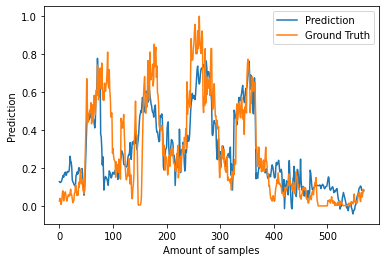

In [36]:
plt.plot(range(len(pred_train)), pred_train, label='Prediction')
plt.plot(range(len(pred_train)), train_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [37]:
pred_train.shape

(569, 1)

In [38]:
stock_df_train[2:,:-1].shape

(569, 15)

In [39]:
#把新的特征量合并加入数据集
df_train= np.hstack((stock_df_train[2:,:-1], pred_train))
df_train=np.hstack((df_train,np.mat(stock_df_train[2:,-1]).T))
df_valid=np.hstack((stock_df_valid[2:,:-1], pred_valid))
df_valid=np.hstack((df_valid,np.mat(stock_df_valid[2:,-1]).T))
df_test=np.hstack((stock_df_test[2:,:-1], pred_test))
df_test=np.hstack((df_test,np.mat(stock_df_test[2:,-1]).T))

In [40]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(569, 17)
(25, 17)
(79, 17)


In [41]:
train_X, train_y = split_x_and_y(df_train,4)
valid_X, valid_y = split_x_and_y(df_valid,4)
test_X, test_y = split_x_and_y(df_test,4)

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=100,input_shape=(4,16),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))#防止过拟合，过拟合了可能就搞不出来了
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.summary()
model.compile(
    optimizer='adam',
    loss='mse'
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 100)            46800     
                                                                 
 dropout (Dropout)           (None, 4, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 89,105
Trainable params: 89,105
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=21,
    epochs=300
)

Epoch 1/300
27/27 [==============================] - 4s 32ms/step - loss: 0.0645 - val_loss: 0.0010
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0352 - val_loss: 0.0013
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 5.2660e-04
Epoch 4/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.0063
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0242 - val_loss: 0.0029
Epoch 6/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0238 - val_loss: 7.3070e-04
Epoch 7/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0253 - val_loss: 0.0011
Epoch 8/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 4.3552e-04
Epoch 9/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0025
Epoch 10/300
27/27 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.0

In [44]:
pred_y = model.predict(test_X)

3/3 [==============================] - 1s 5ms/step


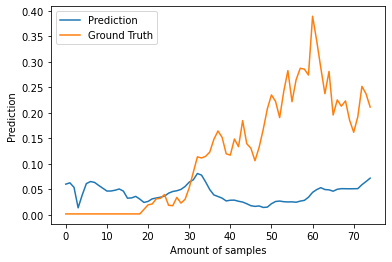

In [45]:
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

18/18 [==============================] - 0s 3ms/step


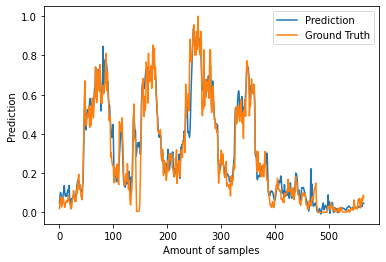

In [46]:
pred=model.predict(train_X)
plt.plot(range(len(pred)), pred, label='Prediction')
plt.plot(range(len(pred)), train_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [119]:
path=input("请输入文件地址：")


In [132]:
#选取路径后对文件处理并建立模型，拟合成一个函数
def model_training(path,traindays,maxrange):
    if path.endswith('.xlsx')==True:
        predf= pd.read_excel(path).drop('Datetime',axis=1)
        scaler = MinMaxScaler()
        scaler = scaler.fit(predf)
        predf= scaler.transform(predf)
        print(predf.shape)
        #得对df_处理成三维的格式
        def deal_df(array, traindays):
            features = list()

            for i in range(traindays, len(array)):
                
                features.append(array[i-traindays:i, :])
                
            return np.array(features)
        #df_=deal_df(predf,traindays)
        #print(df_.shape)
        df1= pd.read_excel('.\\GF001\\03 His_NWP_GF.xlsx').drop('Datetime',axis=1)
        df2=pd.read_excel('.\\GF001\\02 His_Power_GF.xlsx').drop('Datetime',axis=1)
        df = pd.concat([df1, df2], axis=1)
        df_train = df[:int(0.85*len(df))]#这里后7行有改动，这三行改了变量名
        df_valid = df[int(0.85*len(df)):int(0.89*len(df))]
        df_test = df[int(0.88*len(df)):]
       
        for i in range(0,maxrange):
            scaler = MinMaxScaler()#这里后7，把之前的归一化移到这里来
            scaler = scaler.fit(df_train)
            df_train = scaler.transform(df_train)
            train_=df_train.copy()
            df_valid = scaler.transform(df_valid)
            valid_=df_valid.copy()
            df_test =  scaler.transform(df_test)
            test_=df_test.copy()
            df_=deal_df(predf,traindays)
            train_X, train_y = split_x_and_y(df_train,traindays)
            valid_X, valid_y = split_x_and_y(df_valid,traindays)
            test_X, test_y = split_x_and_y(df_test,traindays)
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.LSTM(units=100,input_shape=(traindays,6+i),return_sequences=True))
            model.add(tf.keras.layers.Dropout(0.2))
            model.add(tf.keras.layers.LSTM(64,return_sequences=False))
            model.add(tf.keras.layers.Dropout(0.2))
            model.add(tf.keras.layers.Dense(1))
            model.summary()
            model.compile(
                    optimizer='adam',
                    loss='mse'
                )  
            model.fit(
                train_X, train_y,
                validation_data=(valid_X, valid_y),
                batch_size=21-i,
                epochs=100
            )
            pred_train=model.predict(train_X)
            pred_valid=model.predict(valid_X)
            pred_test=model.predict(test_X) 
            pred_df=model.predict(df_)
            df_train= np.hstack((df_train[traindays:,:-1], pred_train))
            df_train=np.hstack((df_train,np.mat(train_[traindays:,-1]).T))#这里的不用乘
            df_valid=np.hstack((df_valid[traindays:,:-1], pred_valid))
            df_valid=np.hstack((df_valid,np.mat(valid_[traindays:,-1]).T))#这里也不用
            df_test=np.hstack((df_test[traindays:,:-1], pred_test))
            df_test=np.hstack((df_test,np.mat(test_[traindays:,-1]).T))#这里也不用
            predf=np.hstack((predf[traindays:,:], pred_df))
            predf=scaler.inverse_transform(predf)#这里有改动
            result=predf[:,-1].copy()#输出改了
            predf= scaler.transform(predf)
            exchange1=scaler.inverse_transform(df_train[:,:-1])
            exchage2=scaler.inverse_transform(np.hstack((df_train[:,:-2],np.mat(df_train[:,-1]))))
            df_train=np.hstack((exchange1,np.mat(exchage2[:,-1]).T))
            exchange1=scaler.inverse_transform(df_valid[:,:-1])
            exchage2=scaler.inverse_transform(np.hstack((df_valid[:,:-2],np.mat(df_valid[:,-1]))))
            df_valid=np.hstack((exchange1,np.mat(exchage2[:,-1]).T))
            exchange1=scaler.inverse_transform(df_test[:,:-1])
            exchage2=scaler.inverse_transform(np.hstack((df_test[:,:-2],np.mat(df_test[:,-1]))))
            df_test=np.hstack((exchange1,np.mat(exchage2[:,-1]).T))
        plt.plot(range(len(result)), result, label='Prediction')#因为输出改了，这里也改了
        plt.xlabel('Amount of samples',size=15)
        plt.ylabel('Prediction')
        plt.legend()
        plt.show()
    else:  
        print('请输入正确的文件名称xlsx')
    

(672, 6)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 4, 100)            42800     
                                                                 
 dropout_42 (Dropout)        (None, 4, 100)            0         
                                                                 
 lstm_47 (LSTM)              (None, 64)                42240     
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 85,105
Trainable params: 85,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
27/27 [=====================

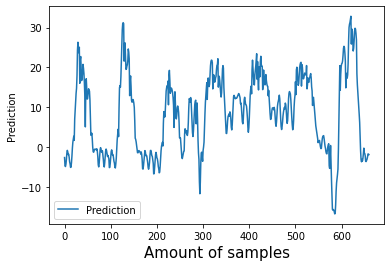

In [133]:
model_training(path,4,3)

In [96]:
df1= pd.read_excel('.\\GF001\\03 His_NWP_GF.xlsx').drop('Datetime',axis=1)
df1.head(10)
df2=pd.read_excel('.\\GF001\\02 His_Power_GF.xlsx').drop('Datetime',axis=1)
#dataset=pd.read_excel('.\\GF001\\04 Fore_NWP_FD.xlsx')
df = pd.concat([df1, df2], axis=1)
df.head(10)

,Irradiance,Speed10,Direction10,Temper,Pressure,Humidity,Power(MW)
0,0.0,6.9614,14.8148,27.32,998.67,92.59,0.0
1,0.0,7.0349,15.1623,27.33,998.68,92.40,0.0
2,0.0,7.1234,14.3874,27.31,998.54,92.42,0.0
3,0.0,7.2816,15.6968,27.29,998.21,92.27,0.0
4,0.0,7.2544,18.7347,27.34,997.92,91.92,0.0
5,0.0,7.1066,21.5469,27.38,997.81,91.60,0.0
6,0.0,7.0586,22.3139,27.38,997.41,91.53,0.0
7,0.0,7.0380,23.1772,27.38,997.12,91.37,0.0
8,0.0,6.9662,24.8728,27.39,997.04,91.22,0.0
9,0.0,6.9710,24.7637,27.41,996.88,91.00,0.0


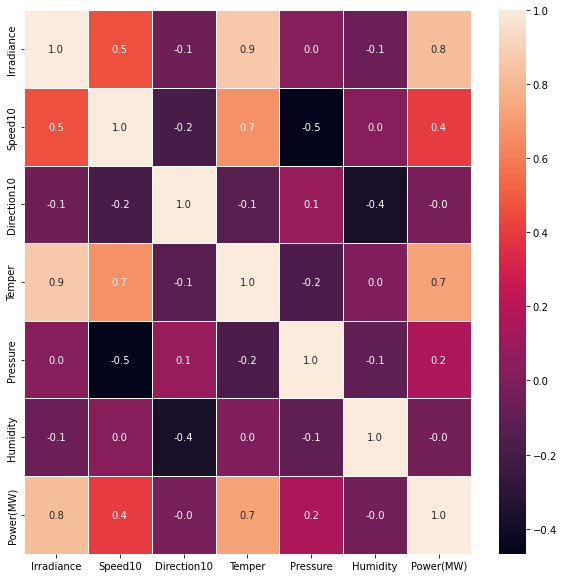

In [97]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [98]:
stock_df_train = df[:int(0.7*len(df))]
stock_df_valid = df[int(0.7*len(df)):int(0.85*len(df))]
stock_df_test = df[int(0.85*len(df)):]

In [99]:
scaler = MinMaxScaler()
scaler = scaler.fit(stock_df_train)
stock_df_train = scaler.transform(stock_df_train)
stock_df_valid = scaler.transform(stock_df_valid)
stock_df_test =  scaler.transform(stock_df_test)

In [100]:
def split_x_and_y(array, days_used_to_train):
    features = list()
    labels = list()

    for i in range(days_used_to_train, len(array)):
        features.append(array[i-days_used_to_train:i, :-1])
        labels.append(array[i, -1])
    return np.array(features), np.array(labels)

train_X, train_y = split_x_and_y(stock_df_train,4)
valid_X, valid_y = split_x_and_y(stock_df_valid,4)
test_X, test_y = split_x_and_y(stock_df_test,4)

print('Shape of Train X: {} \n Shape of Train y: {}'.format(train_X.shape, train_y.shape))
print(train_X[:5, -1, -1])
print(train_y[:5])

Shape of Train X: (466, 4, 6) 
 Shape of Train y: (466,)
[0.9245491  0.92104208 0.91783567 0.91713427 0.91553106]
[0. 0. 0. 0. 0.]


In [101]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,activation='relu',input_shape=(4,6),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64,activation='relu',return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 4, 64)             18176     
                                                                 
 dropout_12 (Dropout)        (None, 4, 64)             0         
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51,265
Trainable params: 51,265
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=14,
    epochs=100
)

Epoch 1/100
34/34 [==============================] - 3s 14ms/step - loss: 0.0933 - accuracy: 0.4592 - val_loss: 0.0769 - val_accuracy: 0.4639
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.4614 - val_loss: 0.0259 - val_accuracy: 0.4639
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.4614 - val_loss: 0.0277 - val_accuracy: 0.4639
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.4614 - val_loss: 0.0207 - val_accuracy: 0.4639
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.4614 - val_loss: 0.0154 - val_accuracy: 0.4639
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.4614 - val_loss: 0.0219 - val_accuracy: 0.4639
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.4614 - val_loss: 0.0202 - val_accuracy: 0.4639
Epoch 8/100


In [103]:
pred_y = model.predict(test_X)

4/4 [==============================] - 0s 2ms/step


In [104]:
pred_y.shape

(97, 1)

In [105]:
test_y.shape

(97,)

In [106]:
test_X.shape

(97, 4, 6)

In [107]:
loss,test_acc = model.evaluate(test_X,  test_y)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.4536
Test accuracy: 0.4536082446575165


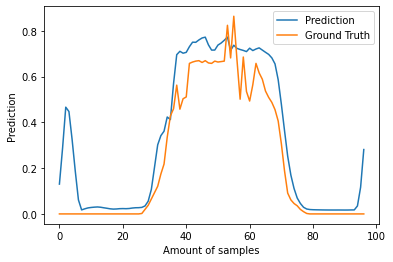

In [108]:
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [109]:
pred_train=model.predict(train_X)
pred_valid=model.predict(valid_X)
pred_test=model.predict(test_X)

4/4 [==============================] - 0s 2ms/step


In [110]:
df_train= np.hstack((stock_df_train[4:,:-1], pred_train))
df_train=np.hstack((df_train,np.mat(stock_df_train[4:,-1]).T))
df_valid=np.hstack((stock_df_valid[4:,:-1], pred_valid))
df_valid=np.hstack((df_valid,np.mat(stock_df_valid[4:,-1]).T))
df_test=np.hstack((stock_df_test[4:,:-1], pred_test))
df_test=np.hstack((df_test,np.mat(stock_df_test[4:,-1]).T))

In [111]:
train_X, train_y = split_x_and_y(df_train,4)
valid_X, valid_y = split_x_and_y(df_valid,4)
test_X, test_y = split_x_and_y(df_test,4)

In [112]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=100,input_shape=(4,7),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.summary()
model.compile(
    optimizer='adam',
    loss='mse'
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 4, 100)            43200     
                                                                 
 dropout_14 (Dropout)        (None, 4, 100)            0         
                                                                 
 lstm_19 (LSTM)              (None, 64)                42240     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 85,505
Trainable params: 85,505
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(
    train_X, train_y,
    validation_data=(valid_X, valid_y),
    batch_size=13,
    epochs=300
)

Epoch 1/300
36/36 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0316
Epoch 2/300
36/36 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0295
Epoch 3/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0286
Epoch 4/300
36/36 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0210
Epoch 5/300
36/36 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0344
Epoch 6/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0277
Epoch 7/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0246
Epoch 8/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0237
Epoch 9/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0200
Epoch 10/300
36/36 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0234
Epoch 11/

In [117]:
pred_y = model.predict(test_X)

3/3 [==============================] - 0s 3ms/step


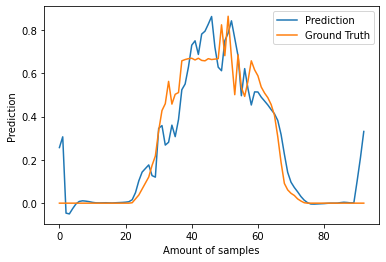

In [118]:
plt.plot(range(len(pred_y)), pred_y, label='Prediction')
plt.plot(range(len(pred_y)), test_y, label='Ground Truth')
plt.xlabel('Amount of samples')
plt.ylabel('Prediction')
plt.legend()
plt.show()